# ASTR 19 Group Project
- Facilitator: Sabrina Lee
- Scribe: Alia Toth-Smith
- nterfacer: Gordon Cai
- Editor: Ali Taquie

## Step 1
Define an oscillatory function in Python to describe the intra- and inter-day variations in the tide.

In [90]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [91]:
#define the oscillatory function
def oscillatory_function(x, A, B, omega, phi):
    return A * np.sin(omega * x *np.pi + phi) + B

#define the oscillatory function
def poly3_function(x, a, b, c, d):
    return a*(x**3) + b*(x**2) + c*x + d
#define the oscillatory function
def sinusoid(x,A,f,p, b):
    return A*np.sin(.25*np.pi*f*x + p) + b

## Step 2

Using the scipy library, fit the oscillatory function to the data assuming the root mean squared experimental error on the height of the tide is 0.25 ft.

In [92]:
def minutes_to_hours(time_str):
    hours, minutes = map(int, time_str.split(':'))
    time = hours + (minutes / 60)

    return time

In [93]:
#get data from the data file
_, times, heights = np.loadtxt('ASTR19_F23_group_project_data.txt', dtype=
               [('day', 'i'), ('time', 'U5'), ('value', float)], skiprows=3, unpack=True)

#adjust times to numbers to be plotted
adjTimes = np.array([minutes_to_hours(time) for time in times])

In [94]:
y_err = np.full(len(times), .25)
adjTimes_new = np.linspace(np.min(adjTimes), np.max(adjTimes), 1000)

# Fit the function to the data
popt, pcov = curve_fit(sinusoid, adjTimes, heights, sigma=y_err)


 Graph both the model and the data on the same plot. 
 
 Label the data, provide sufficient labeling of the axes to provide clarity, and have the notebook save the figure to a PDF.

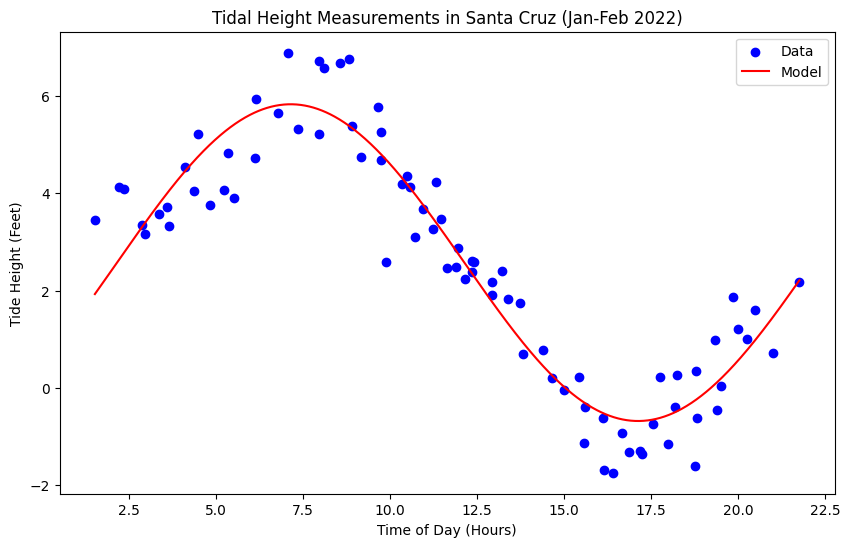

In [95]:
# Plot the data and model
plt.figure(figsize=(10, 6))
plt.scatter(adjTimes, heights, label='Data', color='blue')
plt.plot(adjTimes_new, sinusoid(adjTimes_new, *popt), label='Model', color='red')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Tide Height (Feet)')
plt.title('Tidal Height Measurements in Santa Cruz (Jan-Feb 2022)')
plt.legend()
plt.savefig('tides_model.pdf')
plt.show()

## Step 3

Subtract off the best fit function from the data and plot the residuals.

In [96]:
tides_model_heights = sinusoid(adjTimes, *popt)

#compute residuals
residuals = heights - tides_model_heights

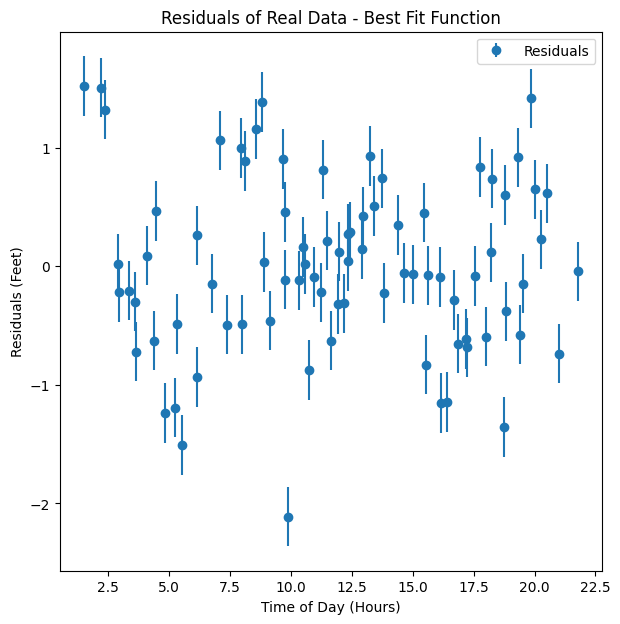

In [97]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
ax.errorbar(adjTimes, residuals, y_err, fmt='o', label='Residuals')
ax.set_xlabel('Time of Day (Hours)')
ax.set_ylabel('Residuals (Feet)')
plt.title('Residuals of Real Data - Best Fit Function')

plt.legend(frameon=True, fontsize=10, handletextpad=1)
plt.show()

Assess graphically and mathematically deviations of the measured tidal data from the model. 

- Plot a histogram of the residuals
-  Save the histogram as a PDF using our histogram best practices, including labeling of the data, axis labels, and "reasonable" bin widths as demonstrated in class.

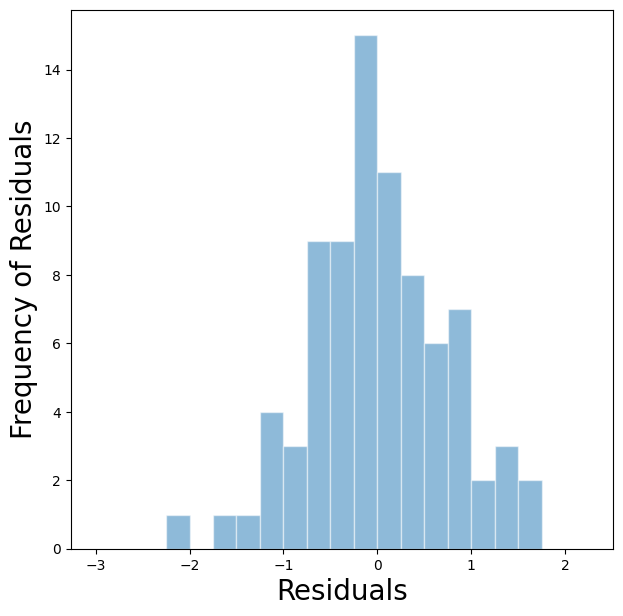

In [110]:
#create the histogram bins
width = .25
histmin = np.floor(min(residuals))  #round to closest smaller integer
histmax = np.ceil(max(residuals))  + 2*width #round to closest higher integer

bins = np.arange(histmin, histmax, width)


f, ax = plt.subplots(1, 1, figsize=(7,7))
ax.hist(residuals, bins=bins, alpha=0.5, edgecolor='white', density=False)

ax.set_xlabel('Residuals', fontsize=20)
ax.set_ylabel('Frequency of Residuals', fontsize=20)

plt.savefig('tides_residuals_histogram.pdf')
plt.show()

- Measure the standard deviation

In [99]:
tide_residual_std = np.std(residuals)

print(f'The standard deviation of the tide residuals is {tide_residual_std}.')

The standard deviation of the tide residuals is 0.7342740162403292.


- Is the scatter in the data larger than the assumed experimental error?
     - Yes
- Estimate the intrinsic scatter in the data after accounting for the assumed measurement error.

In [100]:
intrinsic_scatter = tide_residual_std - .25

print(f'The instrinsic scatter is about {intrinsic_scatter}')

The instrinsic scatter is about 0.4842740162403292


## Step 4

During the first high-tide of January 14, the tsunami from the underwater eruption of the Hunga Tonga-Hunga Ha'apai volcano reached the shores of Santa Cruz. The tsunami increased water levels near high tide by about 2ft. 

How large of a deviation is this tsunami, in terms of standard deviations of the distribution of normal tides from the model? Add a single 2ft outlier to the histogram of data and replot it as part of your Jupyter notebook.

In [102]:
outlier = 2

In [112]:
std_deviation = outlier / tide_residual_std

print(f'The tsunami is {std_deviation} standard deviations away from the distribution of normal tides from the model.')

The tsunami is 2.723778801598498 standard deviations away from the distribution of normal tides from the model.


In [105]:
#adding outlier to the data
residuals_new = np.append(residuals, outlier)

print(residuals_new)

[ 0.8867367  -0.076579    0.03637736 -1.14510518  0.45545673 -0.68435437
  0.01706294 -0.59331797  0.21382871 -1.35403359  0.27062784 -0.1473761
  0.50643598  0.22717446 -0.20615384 -0.73787792  0.08932327 -0.04449935
 -1.23848198  0.12102104 -1.5067676   0.14320067 -0.93357841  0.73914751
 -0.14853654  0.34785009 -0.49380993 -0.06943409 -0.49120743 -0.83047842
  1.15475589 -0.09255122 -0.46034189 -0.28525548 -0.11454327 -0.6134519
 -0.11938772  0.83600074 -0.09221097  0.73795302 -0.62838813  0.59900131
  0.29170817  0.91674003  1.31973952  1.41402866 -0.21662493  0.6130304
 -0.30033972 -0.87576952 -0.62721777 -0.32010991 -1.19205388  0.41974403
  0.26105739 -0.22669316  1.05990835 -0.05760704  0.99443799  0.45100352
  1.38238487 -1.15214857  0.90398462 -0.65413896  0.1623201  -0.08305268
  0.81443387  0.11522995 -0.31413055 -0.37959771  1.51921824 -0.57744909
  1.50331663  0.64856559  0.01971421 -2.11005702 -0.72092466 -0.22138294
  0.46529858  0.04062784 -0.48859691  0.92717053  2.  

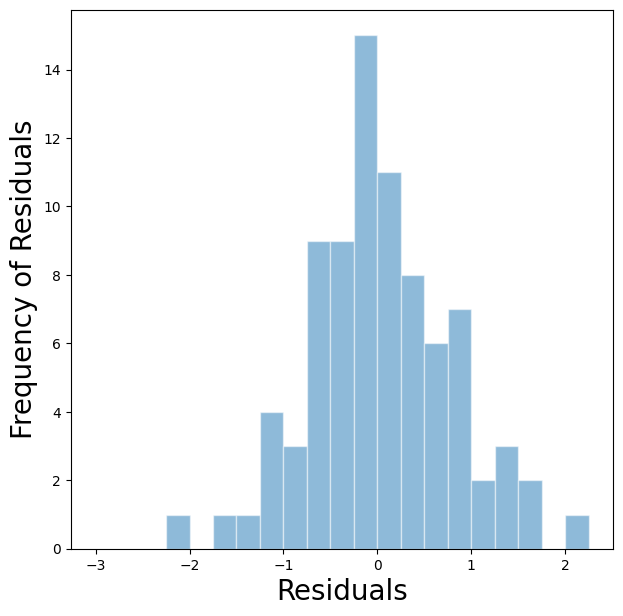

In [111]:
#create the histogram bins
width = .25
histmin = np.floor(min(residuals_new))  #round to closest smaller integer
histmax = np.ceil(max(residuals_new)) + 2*width  #round to closest higher integer

bins = np.arange(histmin, histmax, width)


f, ax = plt.subplots(1, 1, figsize=(7,7))
ax.hist(residuals_new, bins=bins, alpha=0.5, edgecolor='white', density=False)

ax.set_xlabel('Residuals', fontsize=20)
ax.set_ylabel('Frequency of Residuals', fontsize=20)

plt.savefig('tides_residuals_histogram.pdf')
plt.show()